# A few tweaks
Rather than creating separate CSVs for each year, we made one report on FanGraphs that encompasses 2015 through 2021, with a minimum of 90 plate appearances across the board to get us 3,000 observations. This way we don't need a for loop to get the initial dataframe. It also gives us a 'Season' column that will come in handy later. Because of the timing this gives us an additional month of data for 2021, rather than cutting it off at the All-Star break.

We also checked the "Split Teams" box on FanGraphs, which separates a player's numbers for each team if he played for more than one team that year. This eliminates missing values (i.e. the '- - -' string) in the 'Team' column. 

A lot of the wrangling is the same as was presented in the proposal. Anything different will be indicated in a markdown cell.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
FanGraphs_df = pd.read_csv("FG_Stats_15-21.csv")

In [4]:
FanGraphs_df.head()

,Season,Name,Team,Age,AB,PA,HR,H,1B,2B,...,Cent%,Oppo%,EV,LA,Barrels,Barrel%,maxEV,HardHit%,Events,playerid
0,2021,Byron Buxton,MIN,27,103,110,10,38,17,11,...,25.6%,24.4%,93.1,8.6,16,20.5%,115.6,57.7%,78,14161
1,2020,Juan Soto,WSN,21,154,196,13,54,27,14,...,43.7%,23.8%,92.1,4.2,22,17.5%,113.3,51.6%,126,20123
2,2020,Ke'Bryan Hayes,PIT,23,85,95,5,32,18,7,...,40.0%,35.4%,92.8,7.4,6,9.2%,110.3,55.4%,65,18577
3,2015,Bryce Harper,WSN,22,521,654,42,172,91,38,...,33.8%,20.8%,91.4,14.7,48,12.2%,116.0,47.7%,394,11579
4,2018,Luke Voit,NYY,27,132,148,14,44,25,5,...,39.8%,20.4%,93.0,15.3,19,20.4%,112.3,54.8%,93,14811


In [5]:
FanGraphs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 46 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Season      3095 non-null   int64  
 1   Name        3095 non-null   object 
 2   Team        3095 non-null   object 
 3   Age         3095 non-null   int64  
 4   AB          3095 non-null   int64  
 5   PA          3095 non-null   int64  
 6   HR          3095 non-null   int64  
 7   H           3095 non-null   int64  
 8   1B          3095 non-null   int64  
 9   2B          3095 non-null   int64  
 10  3B          3095 non-null   int64  
 11  BB%         3095 non-null   object 
 12  K%          3095 non-null   object 
 13  BB/K        3095 non-null   float64
 14  AVG         3095 non-null   float64
 15  SLG         3095 non-null   float64
 16  OBP         3095 non-null   float64
 17  ISO         3095 non-null   float64
 18  BABIP       3095 non-null   float64
 19  GB/FB       3095 non-null  

In [6]:
FanGraphs_df.describe()

,Season,Age,AB,PA,HR,H,1B,2B,3B,BB/K,...,OBP,ISO,BABIP,GB/FB,EV,LA,Barrels,maxEV,Events,playerid
count,3095.000000,3095.000000,3095.000000,3095.000000,3095.000000,3095.000000,3095.000000,3095.000000,3095.000000,3095.000000,...,3095.000000,3095.000000,3095.000000,3095.000000,3095.000000,3095.000000,3095.000000,3095.000000,3095.000000,3095.000000
mean,2017.862682,28.267205,297.486914,332.535057,10.979645,76.621002,48.848788,15.282714,1.509855,0.412750,...,0.319014,0.163694,0.295899,1.330856,88.258352,12.239580,14.598708,109.753893,230.276898,10449.658481
std,1.977462,3.784858,161.391348,180.779584,9.406597,46.830977,30.691572,10.177507,1.907649,0.204719,...,0.041863,0.062880,0.044348,0.544204,2.367262,4.755336,12.825637,3.427709,132.892611,5089.448215
min,2015.000000,19.000000,73.000000,90.000000,0.000000,9.000000,5.000000,0.000000,0.000000,0.040000,...,0.163000,0.000000,0.125000,0.300000,78.200000,-7.900000,0.000000,97.700000,41.000000,211.000000
25%,2016.000000,25.000000,157.000000,176.000000,4.000000,37.000000,24.000000,7.000000,0.000000,0.270000,...,0.292000,0.119000,0.268000,0.960000,86.700000,9.050000,5.000000,107.500000,116.000000,5930.000000
50%,2018.000000,28.000000,258.000000,289.000000,8.000000,65.000000,41.000000,13.000000,1.000000,0.380000,...,0.320000,0.160000,0.297000,1.220000,88.300000,12.300000,11.000000,109.600000,198.000000,10822.000000
75%,2019.000000,31.000000,422.000000,468.000000,16.000000,111.000000,70.000000,22.000000,2.000000,0.520000,...,0.347000,0.205000,0.326000,1.570000,89.800000,15.500000,21.000000,112.100000,328.500000,14145.000000
max,2021.000000,43.000000,681.000000,747.000000,59.000000,216.000000,170.000000,56.000000,15.000000,2.400000,...,0.490000,0.440000,0.456000,5.820000,96.100000,29.800000,84.000000,122.200000,599.000000,27506.000000


In [7]:
print(all(FanGraphs_df))

True


In [8]:
FanGraphs_df['HR/PA'] = round(FanGraphs_df['HR']/FanGraphs_df['PA'], 4)

In [9]:
FanGraphs_df.head()

,Season,Name,Team,Age,AB,PA,HR,H,1B,2B,...,Oppo%,EV,LA,Barrels,Barrel%,maxEV,HardHit%,Events,playerid,HR/PA
0,2021,Byron Buxton,MIN,27,103,110,10,38,17,11,...,24.4%,93.1,8.6,16,20.5%,115.6,57.7%,78,14161,0.0909
1,2020,Juan Soto,WSN,21,154,196,13,54,27,14,...,23.8%,92.1,4.2,22,17.5%,113.3,51.6%,126,20123,0.0663
2,2020,Ke'Bryan Hayes,PIT,23,85,95,5,32,18,7,...,35.4%,92.8,7.4,6,9.2%,110.3,55.4%,65,18577,0.0526
3,2015,Bryce Harper,WSN,22,521,654,42,172,91,38,...,20.8%,91.4,14.7,48,12.2%,116.0,47.7%,394,11579,0.0642
4,2018,Luke Voit,NYY,27,132,148,14,44,25,5,...,20.4%,93.0,15.3,19,20.4%,112.3,54.8%,93,14811,0.0946


## Sorting values by season

In [10]:
FanGraphs_df = FanGraphs_df.sort_values(by = 'Season', ignore_index=True)

In [11]:
FanGraphs_df.head()

,Season,Name,Team,Age,AB,PA,HR,H,1B,2B,...,Oppo%,EV,LA,Barrels,Barrel%,maxEV,HardHit%,Events,playerid,HR/PA
0,2015,Michael Brantley,CLE,28,529,596,15,164,104,45,...,24.6%,89.0,9.5,17,3.5%,110.1,35.8%,483,4106,0.0252
1,2015,Alex Guerrero,LAD,28,219,230,11,51,30,9,...,20.1%,86.9,14.5,11,6.7%,107.0,33.5%,164,15670,0.0478
2,2015,Billy Hamilton,CIN,24,412,454,4,93,78,8,...,28.6%,83.8,11.1,2,0.6%,104.2,8.6%,350,10199,0.0088
3,2015,Matt Duffy,SFG,24,573,612,12,169,123,28,...,33.3%,88.0,7.5,17,3.5%,106.4,31.8%,481,13836,0.0196
4,2015,Cliff Pennington,TOR,31,75,92,2,12,7,3,...,26.7%,84.5,13.0,3,5.0%,103.5,21.7%,60,3395,0.0217


In [12]:
FanGraphs_df.tail()

,Season,Name,Team,Age,AB,PA,HR,H,1B,2B,...,Oppo%,EV,LA,Barrels,Barrel%,maxEV,HardHit%,Events,playerid,HR/PA
3090,2021,Jordan Luplow,CLE,27,98,121,7,17,5,5,...,26.9%,88.1,22.4,9,13.4%,107.6,34.3%,67,16424,0.0579
3091,2021,Tommy La Stella,SFG,32,84,93,1,19,14,3,...,16.4%,89.1,13.6,4,5.4%,106.3,33.8%,74,12371,0.0108
3092,2021,Steven Duggar,SFG,27,217,241,7,58,36,13,...,30.8%,87.5,14.8,12,8.4%,109.1,30.1%,143,17719,0.0290
3093,2021,Nick Madrigal,CHW,24,200,215,2,61,45,10,...,37.0%,85.5,1.7,2,1.1%,105.4,22.8%,184,20521,0.0093
3094,2021,Byron Buxton,MIN,27,103,110,10,38,17,11,...,24.4%,93.1,8.6,16,20.5%,115.6,57.7%,78,14161,0.0909


In [13]:
harper_check = FanGraphs_df[FanGraphs_df['Name'] == 'Bryce Harper']

In [14]:
print(harper_check)

      Season          Name Team  Age   AB   PA  HR    H  1B  2B  ...  Oppo%  \
341     2015  Bryce Harper  WSN   22  521  654  42  172  91  38  ...  20.8%   
512     2016  Bryce Harper  WSN   23  506  627  24  123  73  24  ...  26.3%   
941     2017  Bryce Harper  WSN   24  420  492  29  134  77  27  ...  29.3%   
1708    2018  Bryce Harper  WSN   25  550  695  34  137  69  34  ...  28.2%   
2238    2019  Bryce Harper  PHI   26  573  682  35  149  77  36  ...  24.3%   
2557    2020  Bryce Harper  PHI   27  190  244  13   51  27   9  ...  27.3%   
2771    2021  Bryce Harper  PHI   28  321  383  20   97  51  26  ...  29.4%   

        EV    LA  Barrels  Barrel%  maxEV  HardHit%  Events  playerid   HR/PA  
341   91.4  14.7       48    12.2%  116.0     47.7%     394     11579  0.0642  
512   88.9  14.9       29     7.3%  112.7     35.8%     399     11579  0.0383  
941   91.1  14.1       31     9.6%  116.3     42.6%     324     11579  0.0589  
1708  91.0  14.5       39    10.0%  115.1     4

In [15]:
missing = pd.concat([FanGraphs_df.isnull().sum(), 100 * FanGraphs_df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
Season,0,0.0
Pull%,0,0.0
O-Swing%,0,0.0
Z-Swing%,0,0.0
Swing%,0,0.0
O-Contact%,0,0.0
Z-Contact%,0,0.0
Contact%,0,0.0
Zone%,0,0.0
F-Strike%,0,0.0


In [16]:
FanGraphs_df.select_dtypes(include='object').T

,0,1,2,3,4,5,6,7,8,9,...,3085,3086,3087,3088,3089,3090,3091,3092,3093,3094
Name,Michael Brantley,Alex Guerrero,Billy Hamilton,Matt Duffy,Cliff Pennington,Andrew Susac,Yolmer Sanchez,Alexei Ramirez,Alex Rios,Yoenis Cespedes,...,Brian Goodwin,Ramon Urias,Maikel Franco,Kevin Kiermaier,Enrique Hernandez,Jordan Luplow,Tommy La Stella,Steven Duggar,Nick Madrigal,Byron Buxton
Team,CLE,LAD,CIN,SFG,TOR,SFG,CHW,CHW,KCR,DET,...,CHW,BAL,BAL,TBR,BOS,CLE,SFG,SFG,CHW,MIN
BB%,10.1%,3.0%,6.2%,4.9%,12.0%,9.5%,4.5%,5.0%,3.6%,4.4%,...,10.5%,8.1%,5.2%,7.5%,9.2%,17.4%,8.6%,9.1%,5.1%,3.6%
K%,8.6%,24.8%,16.5%,15.7%,21.7%,29.1%,19.3%,10.9%,16.3%,20.4%,...,21.6%,22.7%,15.8%,26.7%,19.6%,25.6%,11.8%,30.7%,7.9%,22.7%
LD%,22.5%,19.5%,19.6%,20.9%,19.6%,18.9%,22.8%,21.6%,22.2%,21.0%,...,25.2%,24.2%,19.5%,17.5%,20.6%,12.1%,17.8%,25.5%,20.3%,20.5%
GB%,45.8%,41.5%,42.6%,52.6%,41.1%,46.7%,54.1%,49.3%,39.8%,43.3%,...,36.5%,47.6%,48.1%,57.3%,32.4%,30.3%,45.2%,39.0%,59.9%,48.7%
FB%,31.7%,39.0%,37.8%,26.5%,39.3%,34.4%,23.1%,29.1%,38.0%,35.7%,...,38.3%,28.2%,32.4%,25.1%,47.0%,57.6%,37.0%,35.5%,19.8%,30.8%
IFFB%,5.3%,7.8%,5.9%,3.1%,13.6%,16.1%,8.5%,11.3%,7.3%,7.0%,...,11.4%,17.1%,16.1%,4.7%,13.3%,18.4%,3.7%,2.0%,0.0%,4.2%
HR/FB,9.9%,17.2%,3.4%,9.4%,9.1%,9.7%,7.0%,6.6%,3.3%,15.8%,...,15.9%,14.3%,11.8%,4.7%,11.1%,18.4%,3.7%,14.0%,5.6%,41.7%
IFH%,5.5%,7.4%,13.5%,7.9%,0.0%,4.8%,3.0%,8.2%,3.9%,8.7%,...,4.8%,8.5%,4.3%,7.1%,10.8%,5.0%,3.0%,10.9%,10.1%,15.8%


In [17]:
FanGraphs_df_nums = FanGraphs_df.select_dtypes(include=['int64', 'float64'])

In [18]:
FanGraphs_df_nums.head()

,Season,Age,AB,PA,HR,H,1B,2B,3B,BB/K,...,ISO,BABIP,GB/FB,EV,LA,Barrels,maxEV,Events,playerid,HR/PA
0,2015,28,529,596,15,164,104,45,0,1.18,...,0.170,0.318,1.45,89.0,9.5,17,110.1,483,4106,0.0252
1,2015,28,219,230,11,51,30,9,1,0.12,...,0.201,0.261,1.06,86.9,14.5,11,107.0,164,15670,0.0478
2,2015,24,412,454,4,93,78,8,3,0.37,...,0.063,0.264,1.13,83.8,11.1,2,104.2,350,10199,0.0088
3,2015,24,573,612,12,169,123,28,6,0.31,...,0.133,0.336,1.98,88.0,7.5,17,106.4,481,13836,0.0196
4,2015,31,75,92,2,12,7,3,0,0.55,...,0.120,0.182,1.05,84.5,13.0,3,103.5,60,3395,0.0217


In [19]:
FanGraphs_df_obj = FanGraphs_df.select_dtypes(include='object')

In [20]:
FanGraphs_df_obj.head()

,Name,Team,BB%,K%,LD%,GB%,FB%,IFFB%,HR/FB,IFH%,...,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,Pull%,Cent%,Oppo%,Barrel%,HardHit%
0,Michael Brantley,CLE,10.1%,8.6%,22.5%,45.8%,31.7%,5.3%,9.9%,5.5%,...,96.3%,92.6%,45.7%,58.2%,3.1%,42.7%,32.7%,24.6%,3.5%,35.8%
1,Alex Guerrero,LAD,3.0%,24.8%,19.5%,41.5%,39.0%,7.8%,17.2%,7.4%,...,86.5%,75.8%,47.9%,69.6%,14.3%,48.2%,31.7%,20.1%,6.7%,33.5%
2,Billy Hamilton,CIN,6.2%,16.5%,19.6%,42.6%,37.8%,5.9%,3.4%,13.5%,...,89.3%,83.6%,45.7%,64.3%,7.2%,29.4%,42.0%,28.6%,0.6%,8.6%
3,Matt Duffy,SFG,4.9%,15.7%,20.9%,52.6%,26.5%,3.1%,9.4%,7.9%,...,91.9%,83.6%,45.6%,64.4%,7.5%,31.8%,34.9%,33.3%,3.5%,31.8%
4,Cliff Pennington,TOR,12.0%,21.7%,19.6%,41.1%,39.3%,13.6%,9.1%,0.0%,...,85.8%,82.3%,40.6%,58.7%,8.1%,56.7%,16.7%,26.7%,5.0%,21.7%


In [21]:
names_and_teams = FanGraphs_df_obj.iloc[:,:2]

In [22]:
names_and_teams.head()

,Name,Team
0,Michael Brantley,CLE
1,Alex Guerrero,LAD
2,Billy Hamilton,CIN
3,Matt Duffy,SFG
4,Cliff Pennington,TOR


In [23]:
FanGraphs_df_obj = FanGraphs_df_obj.drop(['Name', 'Team'], 1)

In [24]:
FanGraphs_df_obj.head()

,BB%,K%,LD%,GB%,FB%,IFFB%,HR/FB,IFH%,O-Swing%,Z-Swing%,...,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,Pull%,Cent%,Oppo%,Barrel%,HardHit%
0,10.1%,8.6%,22.5%,45.8%,31.7%,5.3%,9.9%,5.5%,24.6%,64.3%,...,96.3%,92.6%,45.7%,58.2%,3.1%,42.7%,32.7%,24.6%,3.5%,35.8%
1,3.0%,24.8%,19.5%,41.5%,39.0%,7.8%,17.2%,7.4%,40.9%,79.2%,...,86.5%,75.8%,47.9%,69.6%,14.3%,48.2%,31.7%,20.1%,6.7%,33.5%
2,6.2%,16.5%,19.6%,42.6%,37.8%,5.9%,3.4%,13.5%,27.6%,63.5%,...,89.3%,83.6%,45.7%,64.3%,7.2%,29.4%,42.0%,28.6%,0.6%,8.6%
3,4.9%,15.7%,20.9%,52.6%,26.5%,3.1%,9.4%,7.9%,30.7%,64.1%,...,91.9%,83.6%,45.6%,64.4%,7.5%,31.8%,34.9%,33.3%,3.5%,31.8%
4,12.0%,21.7%,19.6%,41.1%,39.3%,13.6%,9.1%,0.0%,26.1%,75.0%,...,85.8%,82.3%,40.6%,58.7%,8.1%,56.7%,16.7%,26.7%,5.0%,21.7%


In [25]:
def remove_pct(rows, cols, df):
    for i in range(rows):
        for j in range(cols):
            df.iloc[i, j] = df.iloc[i, j].strip('%')

In [26]:
remove_pct(3095, 22, FanGraphs_df_obj)

In [27]:
FanGraphs_df_obj_cols = list(FanGraphs_df_obj.columns)

In [28]:
print(FanGraphs_df_obj_cols)

['BB%', 'K%', 'LD%', 'GB%', 'FB%', 'IFFB%', 'HR/FB', 'IFH%', 'O-Swing%', 'Z-Swing%', 'Swing%', 'O-Contact%', 'Z-Contact%', 'Contact%', 'Zone%', 'F-Strike%', 'SwStr%', 'Pull%', 'Cent%', 'Oppo%', 'Barrel%', 'HardHit%']


In [29]:
FanGraphs_df_obj.head()

,BB%,K%,LD%,GB%,FB%,IFFB%,HR/FB,IFH%,O-Swing%,Z-Swing%,...,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,Pull%,Cent%,Oppo%,Barrel%,HardHit%
0,10.1,8.6,22.5,45.8,31.7,5.3,9.9,5.5,24.6,64.3,...,96.3,92.6,45.7,58.2,3.1,42.7,32.7,24.6,3.5,35.8
1,3.0,24.8,19.5,41.5,39.0,7.8,17.2,7.4,40.9,79.2,...,86.5,75.8,47.9,69.6,14.3,48.2,31.7,20.1,6.7,33.5
2,6.2,16.5,19.6,42.6,37.8,5.9,3.4,13.5,27.6,63.5,...,89.3,83.6,45.7,64.3,7.2,29.4,42.0,28.6,0.6,8.6
3,4.9,15.7,20.9,52.6,26.5,3.1,9.4,7.9,30.7,64.1,...,91.9,83.6,45.6,64.4,7.5,31.8,34.9,33.3,3.5,31.8
4,12.0,21.7,19.6,41.1,39.3,13.6,9.1,0.0,26.1,75.0,...,85.8,82.3,40.6,58.7,8.1,56.7,16.7,26.7,5.0,21.7


In [30]:
FanGraphs_df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   BB%         3095 non-null   object
 1   K%          3095 non-null   object
 2   LD%         3095 non-null   object
 3   GB%         3095 non-null   object
 4   FB%         3095 non-null   object
 5   IFFB%       3095 non-null   object
 6   HR/FB       3095 non-null   object
 7   IFH%        3095 non-null   object
 8   O-Swing%    3095 non-null   object
 9   Z-Swing%    3095 non-null   object
 10  Swing%      3095 non-null   object
 11  O-Contact%  3095 non-null   object
 12  Z-Contact%  3095 non-null   object
 13  Contact%    3095 non-null   object
 14  Zone%       3095 non-null   object
 15  F-Strike%   3095 non-null   object
 16  SwStr%      3095 non-null   object
 17  Pull%       3095 non-null   object
 18  Cent%       3095 non-null   object
 19  Oppo%       3095 non-null   object
 20  Barrel% 

In [31]:
def change_to_num(cols, df):
    for col in cols:
        df[col] = pd.to_numeric(df[col])  

In [32]:
change_to_num(FanGraphs_df_obj_cols, FanGraphs_df_obj)

In [33]:
FanGraphs_df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BB%         3095 non-null   float64
 1   K%          3095 non-null   float64
 2   LD%         3095 non-null   float64
 3   GB%         3095 non-null   float64
 4   FB%         3095 non-null   float64
 5   IFFB%       3095 non-null   float64
 6   HR/FB       3095 non-null   float64
 7   IFH%        3095 non-null   float64
 8   O-Swing%    3095 non-null   float64
 9   Z-Swing%    3095 non-null   float64
 10  Swing%      3095 non-null   float64
 11  O-Contact%  3095 non-null   float64
 12  Z-Contact%  3095 non-null   float64
 13  Contact%    3095 non-null   float64
 14  Zone%       3095 non-null   float64
 15  F-Strike%   3095 non-null   float64
 16  SwStr%      3095 non-null   float64
 17  Pull%       3095 non-null   float64
 18  Cent%       3095 non-null   float64
 19  Oppo%       3095 non-null  

# Putting it all back together
Unlike before, we know that we need team names. So along with player names we're concatenating those two columns with the columns that were just converted from objects to floats. Then we'll concatenate with the rest of the columns so that the original dataframe is re-assembled.

In [34]:
FanGraphs_df_obj = pd.concat([names_and_teams, FanGraphs_df_obj], axis = 1)

In [35]:
FanGraphs_df_obj.head()

,Name,Team,BB%,K%,LD%,GB%,FB%,IFFB%,HR/FB,IFH%,...,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,Pull%,Cent%,Oppo%,Barrel%,HardHit%
0,Michael Brantley,CLE,10.1,8.6,22.5,45.8,31.7,5.3,9.9,5.5,...,96.3,92.6,45.7,58.2,3.1,42.7,32.7,24.6,3.5,35.8
1,Alex Guerrero,LAD,3.0,24.8,19.5,41.5,39.0,7.8,17.2,7.4,...,86.5,75.8,47.9,69.6,14.3,48.2,31.7,20.1,6.7,33.5
2,Billy Hamilton,CIN,6.2,16.5,19.6,42.6,37.8,5.9,3.4,13.5,...,89.3,83.6,45.7,64.3,7.2,29.4,42.0,28.6,0.6,8.6
3,Matt Duffy,SFG,4.9,15.7,20.9,52.6,26.5,3.1,9.4,7.9,...,91.9,83.6,45.6,64.4,7.5,31.8,34.9,33.3,3.5,31.8
4,Cliff Pennington,TOR,12.0,21.7,19.6,41.1,39.3,13.6,9.1,0.0,...,85.8,82.3,40.6,58.7,8.1,56.7,16.7,26.7,5.0,21.7


In [36]:
FanGraphs_df = pd.concat([FanGraphs_df_obj, FanGraphs_df_nums], axis = 1)

In [37]:
FanGraphs_df.head()

,Name,Team,BB%,K%,LD%,GB%,FB%,IFFB%,HR/FB,IFH%,...,ISO,BABIP,GB/FB,EV,LA,Barrels,maxEV,Events,playerid,HR/PA
0,Michael Brantley,CLE,10.1,8.6,22.5,45.8,31.7,5.3,9.9,5.5,...,0.170,0.318,1.45,89.0,9.5,17,110.1,483,4106,0.0252
1,Alex Guerrero,LAD,3.0,24.8,19.5,41.5,39.0,7.8,17.2,7.4,...,0.201,0.261,1.06,86.9,14.5,11,107.0,164,15670,0.0478
2,Billy Hamilton,CIN,6.2,16.5,19.6,42.6,37.8,5.9,3.4,13.5,...,0.063,0.264,1.13,83.8,11.1,2,104.2,350,10199,0.0088
3,Matt Duffy,SFG,4.9,15.7,20.9,52.6,26.5,3.1,9.4,7.9,...,0.133,0.336,1.98,88.0,7.5,17,106.4,481,13836,0.0196
4,Cliff Pennington,TOR,12.0,21.7,19.6,41.1,39.3,13.6,9.1,0.0,...,0.120,0.182,1.05,84.5,13.0,3,103.5,60,3395,0.0217


In [38]:
FanGraphs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 47 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        3095 non-null   object 
 1   Team        3095 non-null   object 
 2   BB%         3095 non-null   float64
 3   K%          3095 non-null   float64
 4   LD%         3095 non-null   float64
 5   GB%         3095 non-null   float64
 6   FB%         3095 non-null   float64
 7   IFFB%       3095 non-null   float64
 8   HR/FB       3095 non-null   float64
 9   IFH%        3095 non-null   float64
 10  O-Swing%    3095 non-null   float64
 11  Z-Swing%    3095 non-null   float64
 12  Swing%      3095 non-null   float64
 13  O-Contact%  3095 non-null   float64
 14  Z-Contact%  3095 non-null   float64
 15  Contact%    3095 non-null   float64
 16  Zone%       3095 non-null   float64
 17  F-Strike%   3095 non-null   float64
 18  SwStr%      3095 non-null   float64
 19  Pull%       3095 non-null  

In [39]:
FanGraphs_df.describe().T

,count,mean,std,min,25%,50%,75%,max
BB%,3095.0,8.427722,3.306908,0.900,6.05000,8.2000,10.4000,24.4000
K%,3095.0,22.127916,6.529666,3.100,17.50000,21.8000,26.4000,46.3000
LD%,3095.0,21.040226,3.683307,5.200,18.60000,21.0000,23.4000,39.7000
GB%,3095.0,43.519742,7.285310,19.500,38.40000,43.3000,48.5000,66.9000
FB%,3095.0,35.440517,7.281732,11.300,30.50000,35.5000,40.4000,64.9000
IFFB%,3095.0,9.626914,5.101867,0.000,6.10000,9.3000,12.6000,31.8000
HR/FB,3095.0,12.998320,7.202521,0.000,7.90000,12.3000,17.5000,44.4000
IFH%,3095.0,6.615800,3.701236,0.000,4.10000,6.3000,8.8000,33.3000
O-Swing%,3095.0,30.809338,6.191603,13.800,26.50000,30.5000,34.8000,54.0000
Z-Swing%,3095.0,67.968368,6.043487,48.700,63.90000,68.0000,72.0000,88.4000


In [40]:
moving_season = FanGraphs_df.pop("Season")
FanGraphs_df.insert(0, "Season", moving_season)

In [41]:
FanGraphs_df.head()

,Season,Name,Team,BB%,K%,LD%,GB%,FB%,IFFB%,HR/FB,...,ISO,BABIP,GB/FB,EV,LA,Barrels,maxEV,Events,playerid,HR/PA
0,2015,Michael Brantley,CLE,10.1,8.6,22.5,45.8,31.7,5.3,9.9,...,0.170,0.318,1.45,89.0,9.5,17,110.1,483,4106,0.0252
1,2015,Alex Guerrero,LAD,3.0,24.8,19.5,41.5,39.0,7.8,17.2,...,0.201,0.261,1.06,86.9,14.5,11,107.0,164,15670,0.0478
2,2015,Billy Hamilton,CIN,6.2,16.5,19.6,42.6,37.8,5.9,3.4,...,0.063,0.264,1.13,83.8,11.1,2,104.2,350,10199,0.0088
3,2015,Matt Duffy,SFG,4.9,15.7,20.9,52.6,26.5,3.1,9.4,...,0.133,0.336,1.98,88.0,7.5,17,106.4,481,13836,0.0196
4,2015,Cliff Pennington,TOR,12.0,21.7,19.6,41.1,39.3,13.6,9.1,...,0.120,0.182,1.05,84.5,13.0,3,103.5,60,3395,0.0217


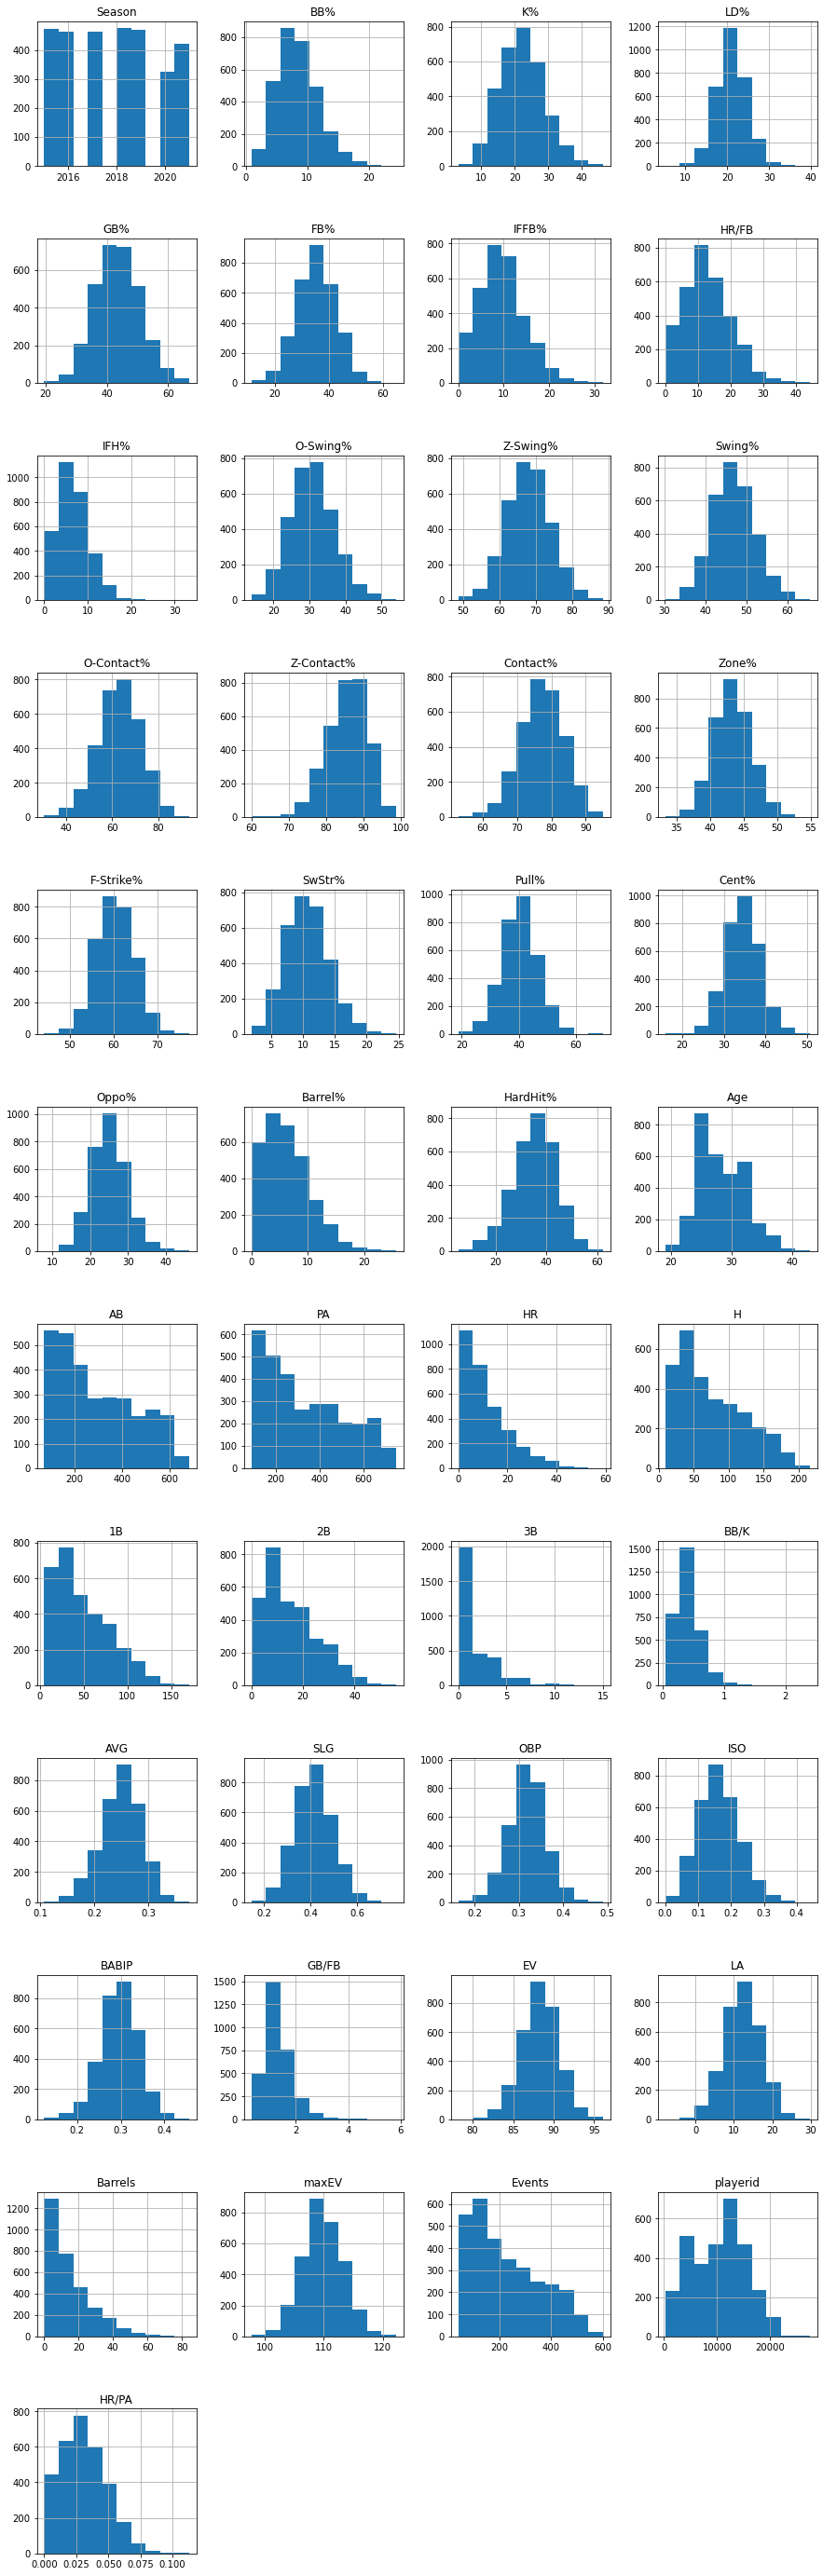

In [42]:
FanGraphs_df.hist(figsize = (15, 50), layout = (12, 4))
plt.subplots_adjust(hspace=0.5);

## Confirming there are no placeholder strings in team names

In [43]:
team_names = FanGraphs_df['Team'].unique()

In [44]:
team_names

array(['CLE', 'LAD', 'CIN', 'SFG', 'TOR', 'CHW', 'KCR', 'DET', 'ATL',
       'MIA', 'WSN', 'PIT', 'CHC', 'SEA', 'BOS', 'MIL', 'BAL', 'PHI',
       'ARI', 'NYM', 'STL', 'TEX', 'HOU', 'SDP', 'NYY', 'TBR', 'MIN',
       'COL', 'LAA', 'OAK'], dtype=object)

# A closer look at plate appearances
Histogram of plate appearances with 30 bins. We have a low requirement for plate appearances in a season so that we have enough observations, but it seems like the highest frequencies of plate appearances are on the low end. That raises the possiblity that some of the percentage features could be outliers since 90 plate appearances is a small sample size for a full season. 

array([[<AxesSubplot:title={'center':'PA'}>]], dtype=object)

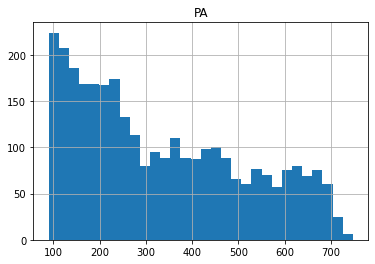

In [45]:
FanGraphs_df.hist(column = 'PA', bins = 30)

# Cut it off at 150?
It seems like there's a sharp increase in frequency when we get below 150 plate appearances. So let's slice the dataframe at 150 and below and see what we get.

In [46]:
less_than_150 = FanGraphs_df[FanGraphs_df['PA'] < 150]

In [47]:
len(less_than_150)

573

In [48]:
less_than_150.describe().T

,count,mean,std,min,25%,50%,75%,max
Season,573.0,2018.279232,2.037808,2015.000,2016.0000,2018.0000,2020.0000,2021.0000
BB%,573.0,7.927400,3.555322,0.900,5.3000,7.5000,10.2000,19.3000
K%,573.0,24.608377,7.483887,3.100,19.5000,24.2000,29.2000,46.3000
LD%,573.0,20.827051,4.944378,5.200,17.5000,20.7000,23.9000,39.7000
GB%,573.0,44.265445,8.341720,19.700,38.5000,43.7000,49.4000,66.7000
FB%,573.0,34.911518,8.073052,11.300,29.4000,35.0000,40.2000,60.5000
IFFB%,573.0,10.367888,6.564663,0.000,5.3000,9.8000,15.0000,31.8000
HR/FB,573.0,11.047295,8.293892,0.000,4.5000,9.8000,15.6000,44.4000
IFH%,573.0,6.694764,4.968651,0.000,3.2000,6.1000,9.4000,33.3000
O-Swing%,573.0,31.051483,6.901405,13.800,26.2000,30.1000,35.6000,53.6000


# Looks like we're OK
The means and medians look reasonably close in both the full dataframe and the 150-and-below dataframe. And the pattern of the scatterplots below for both the full and sliced dataframes look similar to the one in the proposal.

<AxesSubplot:xlabel='HR/PA', ylabel='HR'>

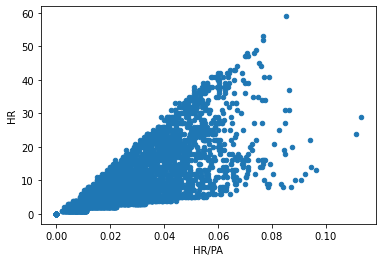

In [49]:
FanGraphs_df.plot(x='HR/PA', y='HR', kind='scatter')

<AxesSubplot:xlabel='HR/PA', ylabel='HR'>

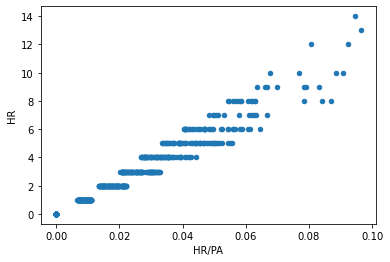

In [50]:
less_than_150.plot(x='HR/PA', y='HR', kind='scatter')

# Adding ballpark data
We ended up using MLB.com's Baseball Savant for ballpark data. The ESPN table was missing stadium names. It had cities but there are two stadiums in Chicago so it turned out city names weren't enough to identify every stadium.

100 is the neutral number for the ballpark data. According to MLB.com's methodology, anything above 100 is favorable for batters and anything below 100 is a disadvantage. Every park has different factor each year because park conditions can vary slightly from year to year. This creates a dataframe of 210 observations.

In [51]:
list_of_park_dfs = []

In [52]:
for i in range(2015, 2022):
    new_df = pd.read_excel('parks_' + str(i) + '.xls')
    list_of_park_dfs.append(new_df)   

In [53]:
parks_df = pd.concat(list_of_park_dfs, ignore_index=True)

### The next step is to get the 'Team' column to match the three-letter team codes in the main dataframe.

In [54]:
parks_df.head()

,Team,Season,Park
0,Rockies,2015,119
1,Indians,2015,94
2,Red Sox,2015,101
3,Rangers,2015,99
4,Orioles,2015,136


In [55]:
parks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Team    210 non-null    object
 1   Season  210 non-null    int64 
 2   Park    210 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 5.0+ KB


In [56]:
team_nicknames = parks_df["Team"].unique()

In [57]:
type(team_nicknames)

numpy.ndarray

# Clarification
Not the best variable naming here, but team_nicknames is the name of the teams taken from our parks dataframe, and team_names is the three-letter team codes from the FanGraphs dataframe.

Don't know where these characters before the team nicknames come from. Fortunately they don't interfere.

In [58]:
team_nicknames

array(['\xa0Rockies', '\xa0Indians', '\xa0Red Sox', '\xa0Rangers',
       '\xa0Orioles', '\xa0D-backs', '\xa0Brewers', '\xa0Twins',
       '\xa0Cubs', '\xa0Astros', '\xa0Reds', '\xa0Royals',
       '\xa0Nationals', '\xa0Phillies', '\xa0Yankees', '\xa0Padres',
       '\xa0Cardinals', '\xa0White Sox', '\xa0Pirates', '\xa0Dodgers',
       '\xa0Blue Jays', '\xa0Mariners', '\xa0Tigers', '\xa0Rays',
       '\xa0Marlins', '\xa0Athletics', '\xa0Angels', '\xa0Mets',
       '\xa0Braves', '\xa0Giants'], dtype=object)

In [59]:
type(team_names)

numpy.ndarray

In [60]:
list(team_names)

['CLE',
 'LAD',
 'CIN',
 'SFG',
 'TOR',
 'CHW',
 'KCR',
 'DET',
 'ATL',
 'MIA',
 'WSN',
 'PIT',
 'CHC',
 'SEA',
 'BOS',
 'MIL',
 'BAL',
 'PHI',
 'ARI',
 'NYM',
 'STL',
 'TEX',
 'HOU',
 'SDP',
 'NYY',
 'TBR',
 'MIN',
 'COL',
 'LAA',
 'OAK']

In [61]:
team_names = sorted(team_names)

In [62]:
team_names

['ARI',
 'ATL',
 'BAL',
 'BOS',
 'CHC',
 'CHW',
 'CIN',
 'CLE',
 'COL',
 'DET',
 'HOU',
 'KCR',
 'LAA',
 'LAD',
 'MIA',
 'MIL',
 'MIN',
 'NYM',
 'NYY',
 'OAK',
 'PHI',
 'PIT',
 'SDP',
 'SEA',
 'SFG',
 'STL',
 'TBR',
 'TEX',
 'TOR',
 'WSN']

In [63]:
list(team_nicknames)

['\xa0Rockies',
 '\xa0Indians',
 '\xa0Red Sox',
 '\xa0Rangers',
 '\xa0Orioles',
 '\xa0D-backs',
 '\xa0Brewers',
 '\xa0Twins',
 '\xa0Cubs',
 '\xa0Astros',
 '\xa0Reds',
 '\xa0Royals',
 '\xa0Nationals',
 '\xa0Phillies',
 '\xa0Yankees',
 '\xa0Padres',
 '\xa0Cardinals',
 '\xa0White Sox',
 '\xa0Pirates',
 '\xa0Dodgers',
 '\xa0Blue Jays',
 '\xa0Mariners',
 '\xa0Tigers',
 '\xa0Rays',
 '\xa0Marlins',
 '\xa0Athletics',
 '\xa0Angels',
 '\xa0Mets',
 '\xa0Braves',
 '\xa0Giants']

In [64]:
len(team_names)

30

In [65]:
len(team_nicknames)

30

# The dictionary
A little hardcoded, but we typed up this list of three-letter team codes to correspond with the order of teams in the team_nicknames list. Then we zip both lists together into a dictionary.

In [66]:
team_names_ordered = ['COL', 'CLE', 'BOS', 'TEX', 'BAL', 'ARI', 'MIL', 'MIN', 'CHC', 'HOU', 'CIN', 'KCR', \
                     'WSN', 'PHI', 'NYY', 'SDP', 'STL', 'CHW', 'PIT', 'LAD', 'TOR', 'SEA', 'DET', 'TBR', \
                     'MIA', 'OAK', 'LAA', 'NYM', 'ATL', 'SFG']

In [67]:
team_dict = dict(zip(team_nicknames, team_names_ordered))

In [68]:
team_dict

{'\xa0Rockies': 'COL',
 '\xa0Indians': 'CLE',
 '\xa0Red Sox': 'BOS',
 '\xa0Rangers': 'TEX',
 '\xa0Orioles': 'BAL',
 '\xa0D-backs': 'ARI',
 '\xa0Brewers': 'MIL',
 '\xa0Twins': 'MIN',
 '\xa0Cubs': 'CHC',
 '\xa0Astros': 'HOU',
 '\xa0Reds': 'CIN',
 '\xa0Royals': 'KCR',
 '\xa0Nationals': 'WSN',
 '\xa0Phillies': 'PHI',
 '\xa0Yankees': 'NYY',
 '\xa0Padres': 'SDP',
 '\xa0Cardinals': 'STL',
 '\xa0White Sox': 'CHW',
 '\xa0Pirates': 'PIT',
 '\xa0Dodgers': 'LAD',
 '\xa0Blue Jays': 'TOR',
 '\xa0Mariners': 'SEA',
 '\xa0Tigers': 'DET',
 '\xa0Rays': 'TBR',
 '\xa0Marlins': 'MIA',
 '\xa0Athletics': 'OAK',
 '\xa0Angels': 'LAA',
 '\xa0Mets': 'NYM',
 '\xa0Braves': 'ATL',
 '\xa0Giants': 'SFG'}

In [69]:
parks_df = parks_df.replace({"Team": team_dict})

In [70]:
parks_df

,Team,Season,Park
0,COL,2015,119
1,CLE,2015,94
2,BOS,2015,101
3,TEX,2015,99
4,BAL,2015,136
...,...,...,...
205,STL,2021,83
206,DET,2021,72
207,MIA,2021,82
208,TBR,2021,82


# Outlier
There's one outlier in the parks dataframe, 177 for CIN in 2020. After examining that in the next few cells, it doesn't look like anything to worry about. CIN occurs three times among the top 15 park factors, and after all, The Great American Ballpark, which is the stadium's name, often has been called The Great American Small Park.

array([[<AxesSubplot:title={'center':'Park'}>]], dtype=object)

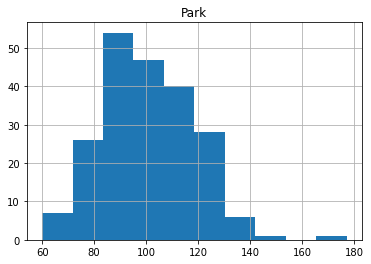

In [71]:
parks_df.hist(column = 'Park')

In [72]:
parks_df.describe()

,Season,Park
count,210.000000,210.000000
mean,2018.000000,100.466667
std,2.004779,17.421082
min,2015.000000,60.000000
25%,2016.000000,88.000000
50%,2018.000000,99.000000
75%,2020.000000,111.750000
max,2021.000000,177.000000


In [73]:
parks_df[parks_df['Park'] == 177]

,Team,Season,Park
151,CIN,2020,177


In [75]:
parks_df[parks_df['Park'] > 130]

,Team,Season,Park
4,BAL,2015,136
6,MIL,2015,134
8,CHC,2015,133
40,NYY,2016,136
67,PHI,2017,136
94,CIN,2018,135
151,CIN,2020,177
180,BAL,2021,143


In [78]:
parks_df.sort_values(by='Park', ascending = False).head(15)

,Team,Season,Park
151,CIN,2020,177
180,BAL,2021,143
4,BAL,2015,136
40,NYY,2016,136
67,PHI,2017,136
94,CIN,2018,135
6,MIL,2015,134
8,CHC,2015,133
188,LAD,2021,130
90,COL,2018,127


# The merge
We merge the dataframes together using the team name and year to fill the park factor column.

In [265]:
FG_df_merged = FanGraphs_df.merge(parks_df, how = 'outer', on = ['Team', 'Season'])

In [266]:
FG_df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3095 entries, 0 to 3094
Data columns (total 48 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Season      3095 non-null   int64  
 1   Name        3095 non-null   object 
 2   Team        3095 non-null   object 
 3   BB%         3095 non-null   float64
 4   K%          3095 non-null   float64
 5   LD%         3095 non-null   float64
 6   GB%         3095 non-null   float64
 7   FB%         3095 non-null   float64
 8   IFFB%       3095 non-null   float64
 9   HR/FB       3095 non-null   float64
 10  IFH%        3095 non-null   float64
 11  O-Swing%    3095 non-null   float64
 12  Z-Swing%    3095 non-null   float64
 13  Swing%      3095 non-null   float64
 14  O-Contact%  3095 non-null   float64
 15  Z-Contact%  3095 non-null   float64
 16  Contact%    3095 non-null   float64
 17  Zone%       3095 non-null   float64
 18  F-Strike%   3095 non-null   float64
 19  SwStr%      3095 non-null  

In [267]:
FG_df_merged.head()

,Season,Name,Team,BB%,K%,LD%,GB%,FB%,IFFB%,HR/FB,...,BABIP,GB/FB,EV,LA,Barrels,maxEV,Events,playerid,HR/PA,Park
0,2015,Michael Brantley,CLE,10.1,8.6,22.5,45.8,31.7,5.3,9.9,...,0.318,1.45,89.0,9.5,17,110.1,483,4106,0.0252,94
1,2015,Roberto Perez,CLE,14.6,28.3,19.7,53.3,27.0,6.1,21.2,...,0.304,1.97,90.6,3.3,11,112.0,127,2900,0.0310,94
2,2015,Carlos Santana,CLE,16.2,18.3,18.3,44.5,37.1,18.8,11.9,...,0.261,1.20,89.2,12.5,29,111.4,433,2396,0.0285,94
3,2015,Jose Ramirez,CLE,9.0,11.0,16.2,47.6,36.2,13.3,6.1,...,0.232,1.32,86.7,11.6,5,106.7,283,13510,0.0169,94
4,2015,Jerry Sands,CLE,6.8,27.1,19.3,45.5,35.2,12.9,12.9,...,0.298,1.29,90.9,10.4,5,110.3,88,4016,0.0301,94


# What we don't have
Every attempt was made to find data broken down by handedness, meaning left-handed hitters against both left- and right-handed pitchers, and right-handed hitters against lefty and righty pitchers. Unfortunately, those reports on FanGraphs don't include the plate-discipline data or the Statcast numbers. So it looks like our wrangling is done.